# Linear regression

Import all the modules you will need in this notebook here:

In [261]:
# exercise 0
# Put your solution here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
21

21

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [262]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
fram = pd.read_csv('src/fram.txt', sep="\t")
print(fram.head())
fram.describe()




FileNotFoundError: [Errno 2] No such file or directory: 'src/fram.txt'

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [ ]:
# exercise 2
# Put your solution here!

def rescale(s): 
    normalized = (s - s.mean()) / (2 * s.std())
    return normalized

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [ ]:
# exercise 3
# Put your solution here!

fram["sAGE"] = rescale(fram.AGE)
fram["sFRW"] = rescale(fram.FRW)
fram["sSBP"] = rescale(fram.SBP)
fram["sSBP10"] = rescale(fram.SBP10)
fram["sDBP"] = rescale(fram.DBP)
fram["sCHOL"] = rescale(fram.CHOL)
fram["sCIG"] = rescale(fram.CIG)
fram["sCHD"] = rescale(fram.CHD)
fram["sDEATH"] = rescale(fram.DEATH)
fram["sYRS_DTH"] = rescale(fram.YRS_DTH)

# YRS_CHD is not rescaled. It includes values "pre" and therefore it would not be valid to calculate mean without taking into consideration these values. 
# Also replacing all of them with value "-1" (or any other number) is not valid as it would change the mean significantly. Including rescaled "sYRS_CHD" could produce highly biased results.

print(fram)


        ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sSBP  \
0     4988  female   57  135  186    NaN  120   150    0    1  ...  0.676501   
1     3001  female   60  123  165    NaN  100   167   25    0  ...  0.301796   
2     5079  female   54  115  140    NaN   90   213    5    0  ... -0.144281   
3     5162  female   52  102  170    NaN  104   280   15    0  ...  0.391012   
4     4672  female   45   99  185    NaN  105   326   20    0  ...  0.658658   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...  ...       ...   
1389  4132    male   51  100  160    NaN   98   216   30    0  ...  0.212581   
1390  5418    male   50   95  174    NaN  106   192    5    0  ...  0.462384   
1391  6260    male   57   88  144    NaN   96   184   20    0  ... -0.072908   
1392  5786    male   62   87  156    NaN   90   255    0    0  ...  0.141209   
1393  6071    male   45   83  156    NaN   90   255   15    0  ...  0.141209   

      sSBP10      sDBP     sCHOL      s

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [ ]:
# exercise 4
# Put your solution here!

# From now on I am using normalized values for continuous variables, as they help better interpret the resulting regression coefficients.

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.13e-40
Time:                        17:32:44   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [ ]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.44e-46
Time:                        17:33:14   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
Inclusion of age increases the explanatory power of the model 2,1%, FRW explanes the variance of the target variable the most and the variable age explanes the target variable the second most.

Arguments:

Model´s explanatory power can be inspected by R-squared. In case of multiple regression, adjusted R-squared is better, as it takes in consideration complexity of the model and number of variables used.

First model:  Adjusted R-squared:    0.123
Second model: Adjusted R-squared:    0.144

According to these, the first model explanes 12,3% of the target variable and second 14.4%, which is 2,1% more. On the other hand, (14.4-12.3)/12.3 = 0.1707... and therefore the explanatory power of the second model is 17% higher that the explanatory power of the first model.

Also p-value of F-statistics is smaller for the second model, which tells that second model explanes the target variable better than the first one.

Weight (FRW) explanes the variance of systolic blood pressure the most and age the second most.
Coefficients are cleary bigger than 0, std errors are quite small and p-values are small. Weight (FRW) has bigges coefficient and is therefore to consider as the variable that explain the target variable the most. Age has second highest coefficient.


***

Try to add to the model all the interactions with other variables. 

In [ ]:
# exercise 6
# Put your solution here!

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()
print(fit.summary())
    

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.92e-43
Time:                        17:33:18   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

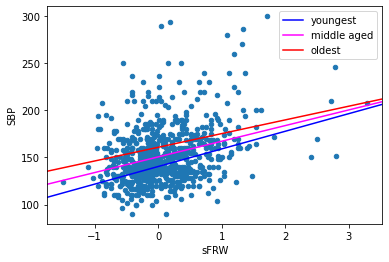

In [ ]:
# exercise 7
# Put your solution here!


fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()
#print(fit.summary())
p=fit.params
#plot the data points
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
#draw the fitted regression lines
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"],ax=plt.gca(), color="blue", label="youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="magenta", label="middle aged")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"],ax=plt.gca(), color="red", label="oldest")
plt.legend()
plt.show()

How does the dependence of blood pressure on weight change as a person gets older?
***

The older a person is, the higher systolic blood pressure is.

Also, the younger a person is, the more weight affects the systolic blood pressure (slope of "youngest" regressionline is biggest and slope of "oldest" regressionline is smallest). The older a person gets, the higher blood pressure is, despite of the weight of a person. The older person is, the higher blood pressure is also for the people who´s weight is low.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.99e-40
Time:                        17:33:25   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

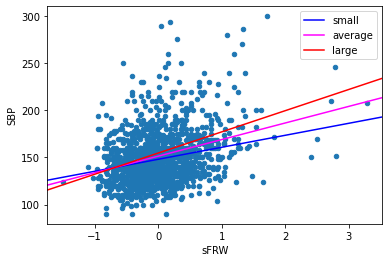

In [ ]:
# exercise 8
# Put your solution here!

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sCHOL:sFRW + sFRW:sAGE +sFRW:sCIG + SEX:sCHOL + SEX:sAGE + SEX:sCIG + sCHOL:sAGE + sCHOL:sCIG + sCIG:sAGE', data=fram).fit()
print(fit.summary())
# When running the previous line, we see that the sFRW has biggest coefficient, meaning it can be considered as "the most important explanatory variable".
p=fit.params

fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"],ax=plt.gca(), color="blue", label="small")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="magenta", label="average")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"],ax=plt.gca(), color="red", label="large")
plt.legend()
    

How does the model and its accuracy look?

***

R-squared:   0.152 is slightly (0.001) higher than in the previous model, but adjusted R-squared is 0.001 lower than in the previous model (ex. 6).
R squared is quite low. The model seems to explane only 15% of the systolic blood pressure. Also in the visualization can cleary be seen that data points doesn´t form a line around fitted lines.

***

# Logistic regression

In [ ]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [ ]:
# exercise 9
# Put your solution here!

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fram.HIGH_BP.head()

fit=smf.glm('HIGH_BP ~ sFRW + SEX + SEX:sFRW', data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(f'error_rate_orig: {error_rate_orig}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Sun, 27 Mar 2022   Deviance:                       1713.7
Time:                        17:33:35   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [ ]:
# exercise 10
# Put your solution here!
fit=smf.glm('HIGH_BP ~ sFRW + SEX + sFRW:SEX + sAGE + sAGE:sFRW + SEX:sAGE', data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

#again error rate
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(f'error_rate: {error_rate}')
# error rate is now smaller than in the previous model, meaning that adding age and it´s interactions to the model makes the model more accurate.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Sun, 27 Mar 2022   Deviance:                       1691.0
Time:                        17:33:38   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

Text(0.5, 1.0, 'male')

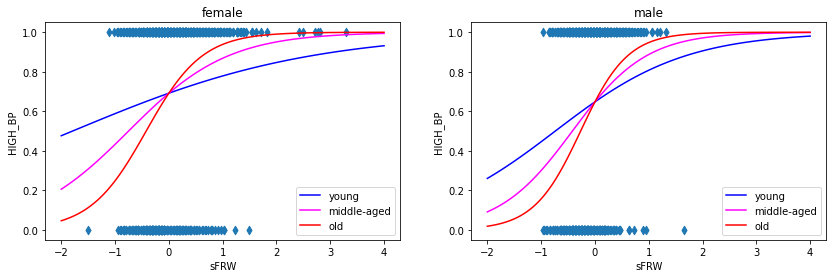

In [ ]:
# exercise 11

def logistic(x):

    return 1.0 / (1.0 + np.exp(-x))

#young, middle aged and old ages defined as follows:
young = 47
middle_aged = 53
old = 61
#normalized ages:
young = (47 - np.mean(fram.AGE)) / (2*np.std(fram.AGE))
middle_aged = (53 - np.mean(fram.AGE)) / (2*np.std(fram.AGE))
old = (61 - np.mean(fram.AGE)) / (2*np.std(fram.AGE))

#used model is "fit" from exercise 10
p=fit.params

#two figures
fig, ax = plt.subplots(1,2, subplot_kw={ "xlabel": "sFRW", "ylabel": "HIGH_BP"}, figsize=(14, 4))

#female, data points
ax[0].scatter(fram.sFRW[(fram.SEX=="female")], fram.HIGH_BP[(fram.SEX=="female")], marker="d")
X=np.linspace(-2, 4, 100)
#female, lines
ax[0].plot(X, logistic(X* (p.sFRW + young  )        + p.Intercept), color="blue", label="young")
ax[0].plot(X, logistic(X* (p.sFRW + middle_aged)    + p.Intercept), color="magenta", label="middle-aged")
ax[0].plot(X, logistic(X* (p.sFRW + old)            + p.Intercept), color="red", label="old")
ax[0].legend()
ax[0].set_title("female")

#male, data points
ax[1].scatter(fram.sFRW[(fram.SEX=="male")], fram.HIGH_BP[(fram.SEX=="male")], marker="d")
X=np.linspace(-2, 4, 100)
#male, lines
ax[1].plot(X, logistic(X* (p.sFRW + young        + p["sFRW:SEX[T.male]"]) + p["SEX[T.male]"]  + p.Intercept), color="blue", label="young")
ax[1].plot(X, logistic(X* (p.sFRW + middle_aged  + p["sFRW:SEX[T.male]"]) + p["SEX[T.male]"]  + p.Intercept), color="magenta", label="middle-aged")
ax[1].plot(X, logistic(X* (p.sFRW + old          + p["sFRW:SEX[T.male]"]) + p["SEX[T.male]"]  + p.Intercept), color="red", label="old")
ax[1].legend()
ax[1].set_title("male")



How do the models with different ages and genders differ from each other?

***
On women high blood pressure depends more on age and weight than on men, because the curves for different ages differ more on women. In both men and women, the older the person is, the more high blood pressure is depended on weight. For old people, according to the model, low weight indicates low blood pressure and over weight indicates high blood pressure (red curve is close to HIGH:BP 0.0 when weight is low and it is close to HIGH_BP 1.0 when weight is high, already when rescaled weight has value 1.5). The younger person is, the less low age indicates low blood pressure and the less high weight indicates high blood pressure.

However, datapoints are not in left down corner and right up corner and therefore this logisic model does not seem a very good model to predict high blood pressure.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [264]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    df_training = df.sample(frac=train_fraction, replace=False)
    df_testing=df.drop(df_training.index)
    return df_training, df_testing

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [265]:
# exercise 13
np.random.seed(1)
# Put your solution here!

#statsmodels.genmod.families.links.logit
#, transform=True
# Error rate of the model:
error_model=[]
error_null = []
for i in range(100):
    train, test = train_test_split(fram, train_fraction=0.8)
    fit=smf.glm(formula="HIGH_BP ~ sFRW + SEX + sFRW:SEX + sAGE + sAGE:sFRW + SEX:sAGE", data=train, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
    pred = fit.predict(test, transform=True) 
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())
mean_error_model = pd.Series(error_model).mean()
mean_error_null = pd.Series(error_null).mean()
print(f'mean error model: {mean_error_model} \nmean error null: {mean_error_null}')
print(statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null, alternative="two-sided"))

C:\Users\Sanni\AppData\Local\Temp/ipykernel_10512/4093251400.py:12: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  fit=smf.glm(formula="HIGH_BP ~ sFRW + SEX + sFRW:SEX + sAGE + sAGE:sFRW + SEX:sAGE", data=train, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()


mean error model: 0.3311827956989248 
mean error null: 0.3488530465949821
MannwhitneyuResult(statistic=3020.0, pvalue=1.2819846293843994e-06)


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [268]:
# exercise 14
# Put your solution here!

#creates hasCHD series
def symptoms(s):
    new = []
    for item in s:
        if item == 0:
            new.append(0)
        elif item > 0:
            new.append(1)
    return new

#adds hasCHD variable to fram
fram["hasCHD"] = symptoms(fram.CHD)


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [282]:
# exercise 15
# Put your solution here!

#exercise created error until I added these here again:
def train_test_split(df, train_fraction=0.8):
    df_training = df.sample(frac=train_fraction, replace=False)
    df_testing = df.drop(df_training.index)
    return df_training, df_testing

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

#solution to exercises 15:


# cross validation:
error_model = []
error_null = []
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit=smf.glm(formula="hasCHD ~ sCIG + sFRW + sFRW:sCIG + sCHOL + sCHOL:sFRW + sCHOL:sCIG", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test) 
    error_rate = np.mean(((pred < 0.5) & (test.hasCHD==1)) | ((pred > 0.5) & (test.hasCHD==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())
error_rate = pd.Series(error_model).mean()
error_null_100 = pd.Series(error_null).mean()
print(f'error model: {error_rate} \nerror null: {error_null_100}')
print(statsmodels.stats.stattools.stats.mannwhitneyu(error_model, error_null, alternative="two-sided"))

error model: 0.22125448028673855 
error null: 0.3488530465949821
MannwhitneyuResult(statistic=0.0, pvalue=2.379173650786697e-34)


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

Text(0.5, 0, 'sCIG')

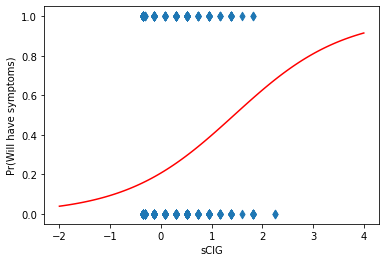

In [ ]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

plt.scatter(fram.sCIG, fram.hasCHD, marker="d")
X=np.linspace(-2, 4, 100)
p = fit.params
plt.plot(X, logistic(X* (p.sCIG + p.sFRW + p["sFRW:sCIG"] + p.sCHOL + p["sCHOL:sFRW"] + p["sCHOL:sCIG"] ) + p.Intercept), color="red")
plt.ylabel("Pr(Will have symptoms)")
plt.xlabel("sCIG")

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Error rate of the model is significantly smaller than error rate "null" (calculated in exercise 15, p-value of Mannwhitneyu test is very small). Erro rate (0.22125448028673855 ) is also smaller than random guess (0.5).
According to error rate prediction accuracy of the model looks good.

Coefficients of explanatory variables (sCIG, sCHOL, sFRW) and their p-values indicate that model could be used to predict wether a person sometimes shows symptoms of coronal heart disease.

Error rate: in the visualization can be seen that many of the datapoints are classified wrong. 
False positives: More than 50%  of datapoints which have value 1 are on the left side of the sigmoid´s midpoint of the logistic function. 
False negatives: There is also datapoints which have value 0 and which are on the right side of the sigmoid´s midpoint. 

Practical use of the model depends on intended use. In some cases this prediction accuracy would be good enough and in other not.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [263]:
# exercise 17
# Put your solution here!
# rescaled values:
chol200 = (200 - fram.CHOL.mean()) / (2*fram.CHOL.std())
smokes17 = (17 - fram.CIG.mean()) / (2*fram.CIG.std())
weight100 = (100 - fram.FRW.mean()) / (2*fram.FRW.std())
point = {"sCHOL":chol200 , "sCIG" : smokes17 , "sFRW" : weight100 }

predicted = fit.predict(point, transform=True)[0]
print(f'If a person has cholesterol 200, smokes 17 cigarets per day, and has weight 100, then the probability that he/she sometimes shows signs of coronal heart disease is: \n{predicted}')

If a person has cholesterol 200, smokes 17 cigarets per day, and has weight 100, then the probability that he/she sometimes shows signs of coronal heart disease is: 
0.2190713229489755
